Section 1 is used to load and facilitate the MNIST dataset

#TODO
see if I need to augment and add an ID identifier to the new data thats appended 

In [1]:
#
# Reading the MNIST dataset
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        

In [2]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
# These may need to be adjusted depending on the location of the files
#
input_path = ''
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

#show_images(images_2_show, titles_2_show)

Section 2 is to read through the data and make a copy of augmented data that can be appended to the dataset

In [3]:
#collect all the images of interest

#get all of the datapoints that are a 5
imagesToAugment = []
imagesToAugmentTitles = []
for i in range(0,60000):
    if y_train[i] == 5:
        imagesToAugment.append(x_train[i])
        imagesToAugmentTitles.append(y_train[i])  

# dont augment test data, as training on it would be questionable
#for i in range(0,10000):
 #   if y_test[i] == 5:
  #      imagesToAugment.append(x_test[i])
   #     imagesToAugmentTitles.append('training image [' + str(i) + '] = ' + str(y_test[i]))  




In [4]:
#Augment all of the datapoints that are a 5

augmentedImages = []

#for i in imagesToAugment:
for i in range(10):

    image = imagesToAugment[i]

    threshold = 75  #minimum value of pixle to qualify for rearanging

    # Flatten the image to a 1D array
    flat_image = np.concatenate(image)

    # Get the indices of non-zero values above the threshold
    non_zero_indices = np.where(flat_image > threshold)[0]

    # Shuffle the non-zero indices randomly
    shuffled_indices = random.sample(non_zero_indices.tolist(), len(non_zero_indices))

    # Create a copy of the flat image to modify
    shuffled_image = [flat_image[i] if i not in non_zero_indices else flat_image[shuffled_indices[non_zero_indices.tolist().index(i)]] for i in range(len(flat_image))]

    # Reshape the array back to the original format
    result_image = np.array_split(np.array(shuffled_image), len(image))

    augmentedImages.append(result_image)





In [5]:
#add the datapoints to a copy of MNIST and add their label

x_train2 = x_train
y_train2 = y_train

for i in range(10):
    x_train2.append(augmentedImages[i])
    y_train2.append(imagesToAugmentTitles[i])

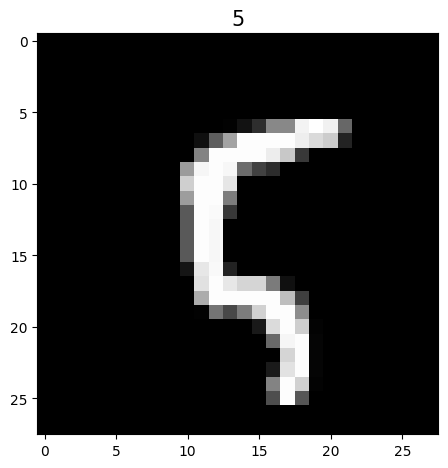

In [6]:
imagePre = []
example = 5
imagePre.append(imagesToAugment[example])
show_images(imagePre, str(imagesToAugmentTitles[example]))

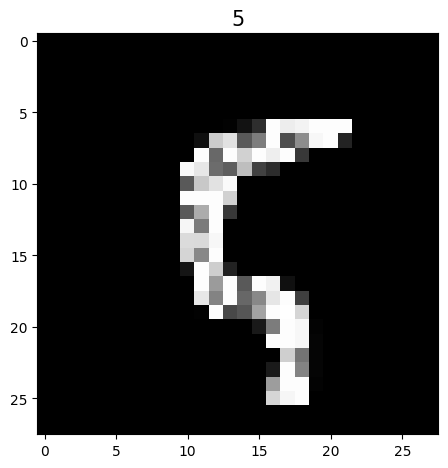

In [8]:
imagePre = []
example = 5
imagePre.append(augmentedImages[example])
show_images(imagePre, str(imagesToAugmentTitles[example]))